In [26]:
#==============================================================================
# Import libraries
#==============================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
#==============================================================================
# #import data from the data file. In our case its Insurance.csv. 
#==============================================================================
path0 = '/Users/Apple/Desktop'
# path_fullset = path0 = '/Users/Apple/Downlaods/Full_Insurance'
insuranceData = pd.read_csv (path0+'/Insurance.csv')
#==============================================================================
# All mathematical operations will be performed on the matrix, so now we create
# matrix for dependent variables and independent variables.
#==============================================================================

X = insuranceData.iloc [:,0:1].values
y = insuranceData.iloc [:, 1].values
print(X[:3],y[:3])

[[25]
 [30]
 [35]] [4500 5000 6000]


In [21]:
# Print the data
print(insuranceData)

   Age  Average Claims per Year (Rupees)
0   25                              4500
1   30                              5000
2   35                              6000
3   40                              8000
4   45                             11000
5   50                             15000
6   55                             20000
7   60                             30000
8   65                             50000
9   70                            100000


In [6]:
# Print the data frame
insuranceData

,Age,Average Claims per Year (Rupees)
0,25,4500
1,30,5000
2,35,6000
3,40,8000
4,45,11000
5,50,15000
6,55,20000
7,60,30000
8,65,50000
9,70,100000


In [7]:
# Head of data
# print(flatdata)
insuranceData.head()

,Age,Average Claims per Year (Rupees)
0,25,4500
1,30,5000
2,35,6000
3,40,8000
4,45,11000


In [8]:
# Tail of data
insuranceData.tail(3)

,Age,Average Claims per Year (Rupees)
7,60,30000
8,65,50000
9,70,100000


In [28]:
#==============================================================================
# Split the dataset into training and test set. We will use 75/25 approach
#==============================================================================

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 1/4, 
                                                     random_state = 0)


In [29]:
print(X_train)

[[70]
 [30]
 [55]
 [60]
 [40]
 [25]
 [50]]


In [31]:
from sklearn.preprocessing import StandardScaler
gl_blr = StandardScaler()
X_train_scaled = independent_scalar.fit_transform(X_train)

/Users/Apple/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [32]:
X_train_scaled

array([[ 1.51524392],
       [-1.13643294],
       [ 0.5208651 ],
       [ 0.8523247 ],
       [-0.47351372],
       [-1.46789254],
       [ 0.18940549]])

In [33]:
#==============================================================================
# Feature scalling 
#==============================================================================
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) #fit and transform
X_test = independent_scalar.transform (X_test) # only transform

/Users/Apple/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [25]:
X_train

array([[ 1.51524392],
       [-1.13643294],
       [ 0.5208651 ],
       [ 0.8523247 ],
       [-0.47351372],
       [-1.46789254],
       [ 0.18940549]])

In [12]:
#==============================================================================
# Fitting the Decision Tree Linear Regression algo to the Training set
#==============================================================================

from sklearn.tree import DecisionTreeRegressor 
#DecisionTreeClassifier is the corresponding Classifier
DTregressor = DecisionTreeRegressor (max_depth=3, random_state = 0)
DTregressor.fit (X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [ ]:
DTregressor_depth4 = DecisionTreeRegressor (max_depth=4, random_state = 0)
DTregressor_depth5 = DecisionTreeRegressor (max_depth=5, random_state = 0)
DTregressor_depth6 = DecisionTreeRegressor (max_depth=6, random_state = 0)


In [13]:
#==============================================================================
# Now check what our model learned by predicting the X_test values
#==============================================================================
predictValues = DTregressor.predict(X_test)
print(predictValues)

[ 5875.  5875.  5875.]


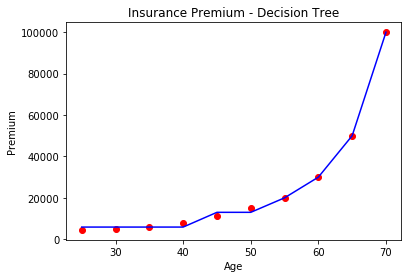

In [14]:
#==============================================================================
# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, DTregressor.predict(X), color = 'blue')
plt.title('Insurance Premium - Decision Tree')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()

In [15]:
#==============================================================================
# Now see how accurately decision tree regressor predict premium based
# on age. Here values will be only exactly from the y array for certain range
# of values as we are taking average.
#==============================================================================
val = 68
predictionDT = DTregressor.predict (val)
print(predictionDT)

[ 100000.]


In [16]:
#==============================================================================
# Fitting the Random Forest Regression algo to the Training set
#==============================================================================

from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFregressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [17]:
#==============================================================================
# Now check what our model learned by predicting the X_test values
#==============================================================================
predictValues2 = RFregressor.predict(X_test)
print(predictValues2)

[ 4600.  4600.  4600.]


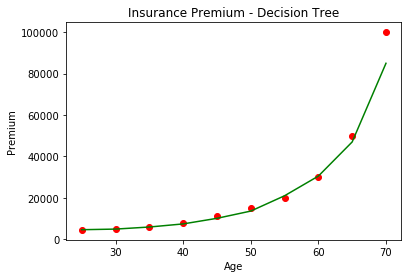

In [18]:
#==============================================================================
# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, RFregressor.predict(X), color = 'green')
plt.title('Insurance Premium - Decision Tree')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()

In [19]:
#==============================================================================
# Now see how accurately Random Forest regressor predict premium based
# on age. Here values will be only exactly from the y array for certain range
# of values as we are taking average.
#==============================================================================
val = 68
predictionRF = RFregressor.predict (val)
print(predictionRF)

[ 85000.]
